<a href="https://colab.research.google.com/github/MayerT1/LiDAR/blob/main/Python_and_R_version_Neon_tree_height_and_Lidar_CHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.neonscience.org/resources/learning-hub/tutorials/tree-heights-veg-structure-chm

R and Python Guide: https://www.neonscience.org/resources/learning-hub/tutorials/neondatastackr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data


# 1. Setup (R code)

In [ ]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
%%R
print("I always forget the %%R")

[1] "I always forget the %%R"


In [ ]:
%%R
install.packages("neonUtilities")
install.packages("neonOS")
install.packages("terra")
install.packages("devtools")
install.packages("dplyr")
install.packages("rlas")

(as ‘lib’ is unspecified)


































	‘/tmp/RtmpwlfRJa/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwlfRJa/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwlfRJa/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwlfRJa/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwlfRJa/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpwlfRJa/downloaded_packages’



In [ ]:
%%R
devtools::install_github("NEONScience/NEON-geolocation/geoNEON")

These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                                 
2: CRAN packages only                  
3: None                                
4: data.table (1.16.4 -> 1.17.0) [CRAN]

Enter one or more numbers, or an empty line to skip updates: 7
Enter one or more numbers, or an empty line to skip updates:  



(as ‘lib’ is unspecified)







	‘/tmp/RtmpwlfRJa/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpwlfRJa/remotesff5b9818d6/NEONScience-NEON-geolocation-59bdef7/geoNEON/DESCRIPTION’ ... OK
* preparing ‘geoNEON’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘geoNEON_1.0.0.9600.tar.gz’



(as ‘lib’ is unspecified)



Libraries

In [ ]:
%%R
library(neonUtilities)
library(neonOS)
library(terra)
library(dplyr)
library(geoNEON)
library(rlas)
library(dplyr)
options(stringsAsFactors=F)


Attaching package: ‘dplyr’



    intersect, union



    filter, lag



    intersect, setdiff, setequal, union




In [ ]:
# wd <- "~/data"
# getwd()
#setwd(wd)

# 2. Vegetation structure data

[Cheatsheet](https://www.neonscience.org/sites/default/files/cheat-sheet-neonUtilities.pdf)

In [ ]:
%%R
veglist <- loadByProduct(dpID="DP1.10098.001",
                         site="GUAN",
                         package="basic",
                         release="RELEASE-2023",
                         check.size = FALSE)

Finding available files
  |======================================================================| 100%

  |======================================================================| 100%

Unpacking zip files using 1 cores.
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking operation across a single core.
Stacking table vst_mappingandtagging
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking table vst_perplotperyear
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking table vst_shrubgroup
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking table vst_non-woody
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Stacking table vst_apparentindividual
  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  
Copied the most recent publication of validation file to /stackedFiles
Copied the most recent publication of categoricalCodes 

In [ ]:
%%R
head(veglist)

$categoricalCodes_10098
                           name        pubCode
                         <char>         <char>
  1:  Identification Qualifiers    cf. species
  2:  Identification Qualifiers   aff. species
  3:  Identification Qualifiers      cf. genus
  4:  Identification Qualifiers     aff. genus
  5:  Identification Qualifiers cf. subspecies
 ---                                          
145:           Yes or No choice              Y
146:           Yes or No choice              N
147: Yes, No, or Unknown choice              Y
148: Yes, No, or Unknown choice              N
149: Yes, No, or Unknown choice              U
                                            description            startDate
                                                 <char>               <char>
  1:    roughly equals but 'not sure' about the species 2012-01-01T00:00:00Z
  2:                  similar to but is not the species 2012-01-01T00:00:00Z
  3:      roughly equals but 'not sure' about the genus 2

In [ ]:
%%R
attributes(veglist)

$names
 [1] "categoricalCodes_10098"      "citation_10098_RELEASE-2023"
 [3] "issueLog_10098"              "readme_10098"               
 [5] "validation_10098"            "variables_10098"            
 [7] "vst_apparentindividual"      "vst_mappingandtagging"      
 [9] "vst_non-woody"               "vst_perplotperyear"         
[11] "vst_shrubgroup"             



In [ ]:
%%R
vegmap <- getLocTOS(veglist$vst_mappingandtagging,
                          "vst_mappingandtagging")

[1] "Please note locations will be calculated only for mapped woody individuals. To find subplot locations for unmapped individuals, use this function with the vst_apparentindividual, vst_non-woody, and/or vst_shrubgroup tables."
  |==================================================================    |  94%

  |===================================================================   |  96%

  |======================================================================| 100%


In [ ]:
# %%R
# df <- vegmap
# glimpse(df)
# write.csv(df, file='vegmap.csv')

In [ ]:
%%R
head(vegmap)

                                      uid         namedLocation       date
1202 02d00b0f-39d2-40c3-b02d-bf988d8100d3 GUAN_044.basePlot.vst 2013-04-04
1203 9a9fe780-07e1-4067-9697-97ab3055f23a GUAN_043.basePlot.vst 2015-05-12
1204 cdc0b2d9-c155-4c0a-bf1d-89689e197456 GUAN_043.basePlot.vst 2015-05-12
1205 6dea2800-66f0-49aa-8320-3a5efcd218e0 GUAN_043.basePlot.vst 2015-05-12
1206 d35a6ed8-7941-46fe-a8ed-37a037a5bde2 GUAN_043.basePlot.vst 2015-05-12
1207 bd5a5012-b5fe-43f6-94ed-4fad8accee29 GUAN_043.basePlot.vst 2015-05-12
           eventID domainID siteID   plotID subplotID nestedSubplotID pointID
1202 vst_GUAN_2017      D04   GUAN GUAN_044        39            <NA>    <NA>
1203 vst_GUAN_2015      D04   GUAN GUAN_043        39               1    <NA>
1204 vst_GUAN_2015      D04   GUAN GUAN_043        39               1    <NA>
1205 vst_GUAN_2015      D04   GUAN GUAN_043        39               1    <NA>
1206 vst_GUAN_2015      D04   GUAN GUAN_043        39               1    <NA>
1207 vs

In [ ]:
%%R
attributes(vegmap)

$names
 [1] "uid"                        "namedLocation"             
 [3] "date"                       "eventID"                   
 [5] "domainID"                   "siteID"                    
 [7] "plotID"                     "subplotID"                 
 [9] "nestedSubplotID"            "pointID"                   
[11] "stemDistance"               "stemAzimuth"               
[13] "recordType"                 "individualID"              
[15] "supportingStemIndividualID" "previouslyTaggedAs"        
[17] "samplingProtocolVersion"    "taxonID"                   
[19] "scientificName"             "taxonRank"                 
[21] "identificationReferences"   "morphospeciesID"           
[23] "morphospeciesIDRemarks"     "identificationQualifier"   
[25] "remarks"                    "measuredBy"                
[27] "recordedBy"                 "dataQF"                    
[29] "publicationDate"            "release"                   
[31] "utmZone"                    "adjNorthing" 

In [ ]:
%%R
veg <- joinTableNEON(veglist$vst_apparentindividual,
                     vegmap,
                     name1="vst_apparentindividual",
                     name2="vst_mappingandtagging")

In [ ]:
%%R
head(veg)

             individualID domainID siteID   plotID         namedLocation
1 NEON.PLA.D04.GUAN.00001      D04   GUAN GUAN_043 GUAN_043.basePlot.vst
2 NEON.PLA.D04.GUAN.00001      D04   GUAN GUAN_043 GUAN_043.basePlot.vst
3 NEON.PLA.D04.GUAN.00001      D04   GUAN GUAN_043 GUAN_043.basePlot.vst
4 NEON.PLA.D04.GUAN.00001      D04   GUAN GUAN_043 GUAN_043.basePlot.vst
5 NEON.PLA.D04.GUAN.00001      D04   GUAN GUAN_043 GUAN_043.basePlot.vst
6 NEON.PLA.D04.GUAN.00001      D04   GUAN GUAN_043 GUAN_043.basePlot.vst
                                 uid.x     date.x     eventID.x subplotID
1 7813d600-1e6a-436e-bdf4-5abc8ae2b4ad 2016-06-21 vst_GUAN_2016        39
2 7813d600-1e6a-436e-bdf4-5abc8ae2b4ad 2016-06-21 vst_GUAN_2016        39
3 7813d600-1e6a-436e-bdf4-5abc8ae2b4ad 2016-06-21 vst_GUAN_2016        39
4 7813d600-1e6a-436e-bdf4-5abc8ae2b4ad 2016-06-21 vst_GUAN_2016        39
5 7813d600-1e6a-436e-bdf4-5abc8ae2b4ad 2016-06-21 vst_GUAN_2016        39
6 7813d600-1e6a-436e-bdf4-5abc8ae2b4ad 2016-0

In [ ]:
%%R
attributes(veg)

$names
 [1] "individualID"                  "domainID"                     
 [3] "siteID"                        "plotID"                       
 [5] "namedLocation"                 "uid.x"                        
 [7] "date.x"                        "eventID.x"                    
 [9] "subplotID"                     "nestedSubplotID"              
[11] "pointID"                       "stemDistance"                 
[13] "stemAzimuth"                   "recordType"                   
[15] "supportingStemIndividualID"    "previouslyTaggedAs"           
[17] "samplingProtocolVersion"       "taxonID"                      
[19] "scientificName"                "taxonRank"                    
[21] "identificationReferences"      "morphospeciesID"              
[23] "morphospeciesIDRemarks"        "identificationQualifier"      
[25] "remarks.x"                     "measuredBy.x"                 
[27] "recordedBy.x"                  "dataQF.x"                     
[29] "publicationDate.x"   

In [ ]:
# %%R
# df <- veg
# glimpse(df)
# write.csv(df, file='veg.csv')

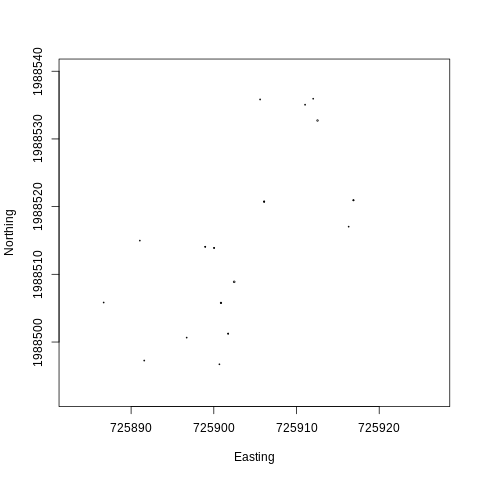

In [ ]:
%%R

symbols(veg$adjEasting[which(veg$plotID=="GUAN_047")],
        veg$adjNorthing[which(veg$plotID=="GUAN_047")],
        circles=veg$stemDiameter[which(veg$plotID=="GUAN_047")]/100/2,
        inches=F, xlab="Easting", ylab="Northing")

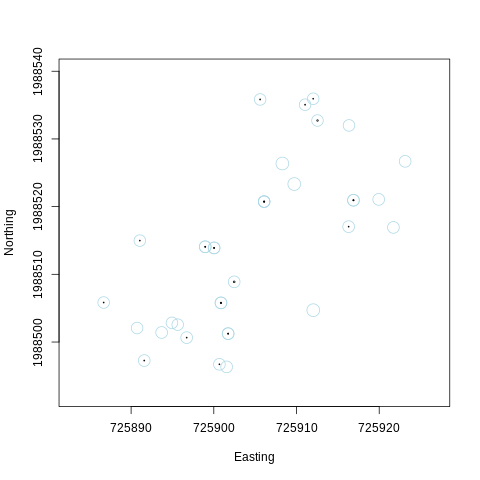

In [ ]:
%%R

symbols(veg$adjEasting[which(veg$plotID=="GUAN_047")],
        veg$adjNorthing[which(veg$plotID=="GUAN_047")],
        circles=veg$stemDiameter[which(veg$plotID=="GUAN_047")]/100/2,
        inches=F, xlab="Easting", ylab="Northing")

symbols(veg$adjEasting[which(veg$plotID=="GUAN_047")],
        veg$adjNorthing[which(veg$plotID=="GUAN_047")],
        circles=veg$adjCoordinateUncertainty[which(veg$plotID=="GUAN_047")],
        inches=F, add=T, fg="lightblue")

# 3. LIDAR (Python code)

full download approach here: https://github.com/MayerT1/COLAB_DEV_GEDI-BDL/blob/main/NEON_Discrete_Lidar_Data.ipynb

In [ ]:
!pip install gdal

In [ ]:
!pip install requests
# !pip install gdal
!pip install fiona
!pip install geopandas
!pip install rasterio
!pip install laspy
!pip install lazrs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.4/626.4 kB 13.8 MB/s eta 0:00:00


In [ ]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import laspy
import pandas as pd

In [ ]:
data_root_path_1 = '/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data'

In [ ]:
dpID='DP1.30003.001'
site = 'GUAN'
year='2018'
data_root_path = data_root_path_1+'/'+site+'/'+year+'/'
shp_path = data_root_path+'shp/'
kml_path = data_root_path+'kml/'
laz_path = data_root_path+'laz/'
print(data_root_path)

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/


In [ ]:
os.listdir(shp_path)

['2018_GUAN_1_merged_tiles.shp', '2018_GUAN_1_merged_tiles.shx']

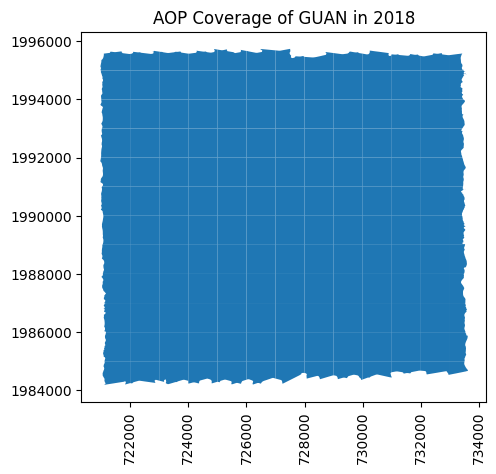

In [ ]:
gdf = gpd.read_file(os.path.join(shp_path,'2018_GUAN_1_merged_tiles.shp'))
gdf.plot();
ax = plt.gca(); ax.ticklabel_format(style='plain')
ax.set_title('AOP Coverage of ' + site + ' in ' + year);
plt.xticks(rotation=90); #optionally rotate the xtick labels

In [ ]:
os.listdir(laz_path)

['NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz']

In [ ]:
#all locations with laz overlappin with the veg structure


# NEON_D04_GUAN_DP1_722000_1986000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_724000_1988000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_724000_1987000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_725000_1989000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_730000_1988000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_729000_1987000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_727000_1986000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_727000_1988000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_727000_1987000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_726000_1988000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_726000_1987000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_725000_1987000_classified_point_cloud_colorized.laz
# NEON_D04_GUAN_DP1_726000_1988000_classified_point_cloud_colorized.laz


In [ ]:
# use os.path.join to get the full path of the laz file
#laz_data_file=os.path.join(laz_path,'NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz')
laz_data_file=os.path.join(laz_path,'NEON_D04_GUAN_DP1_727000_1986000_classified_point_cloud_colorized.laz')
# read the laz file into a LasData object using laspy.read()
point_cloud=laspy.read(laz_data_file)

In [ ]:
point_cloud

<LasData(1.3, point fmt: <PointFormat(3, 4 bytes of extra dims)>, 2968778 points, 2 vlrs)>

In [ ]:
list(point_cloud.point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue',
 'reversible index (lastile)']

In [ ]:
point_cloud.classification

<SubFieldView([2 2 2 ... 7 7 7])>

In [ ]:
set(list(point_cloud.classification))

{1, 2, 5, 6, 7}

In [ ]:
point_cloud.xyz

array([[ 7.25894810e+05,  1.98500265e+06,  2.50000000e-01],
       [ 7.25915210e+05,  1.98500018e+06,  4.20000000e-01],
       [ 7.25893550e+05,  1.98500798e+06,  2.20000000e-01],
       ...,
       [ 7.25085510e+05,  1.98583553e+06, -1.80370000e+02],
       [ 7.25101320e+05,  1.98584004e+06, -2.37230000e+02],
       [ 7.25122790e+05,  1.98583813e+06, -3.05320000e+02]])

In [ ]:
xyz = point_cloud.xyz

In [ ]:
factor=10
points_dec = xyz[::factor]

In [ ]:
# points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

In [ ]:
colors_norm = (colors - np.min(colors))/np.ptp(colors)
colors_dec = colors_norm[::factor]

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

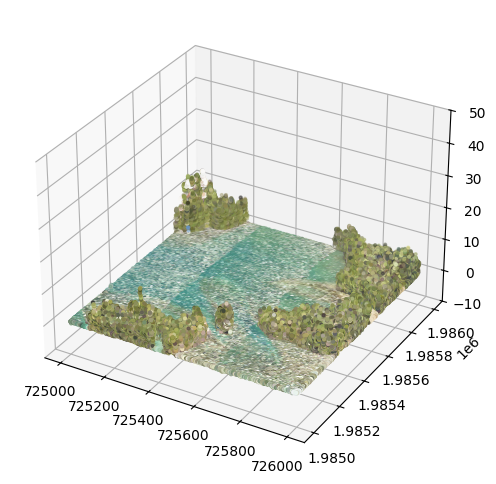

In [ ]:
# Plot the las data in 3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_dec[:,0],points_dec[:,1],points_dec[:,2],color=colors_dec,s=4)
ax.set_zlim3d(-10,50)
plt.show()

test space

In [ ]:
import os
import laspy
import pandas as pd
import geopandas as gpd
from scipy.stats import spearmanr
from shapely.geometry import Point

# Define file paths
laz_path = "/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/2018/laz/" # Update this path
# laz_file = os.path.join(laz_path, "NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz")
laz_file = os.path.join(laz_path, "NEON_D04_GUAN_DP1_727000_1986000_classified_point_cloud_colorized.laz")

veg_file = "/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data/veg.csv"  # The uploaded vegetation data file

# Load LiDAR data
las = laspy.read(laz_file)
# lidar_df = pd.DataFrame({
#     "Easting": las.x,
#     "Northing": las.y,
#     "Elevation": las.z,
#     "Intensity": las.intensity
# })
# #lidar_df.head()

lidar_df = pd.DataFrame({
    "Easting": np.array(las.x),        # Convert ScaledArrayView to NumPy array
    "Northing": np.array(las.y),
    "Lidar_z": np.array(las.z),
    "Intensity": np.array(las.intensity)
})
#lidar_df.head()


# Load vegetation data
veg_df = pd.read_csv(veg_file)

# Convert LiDAR and Veg data to GeoDataFrames for spatial joining
lidar_gdf = gpd.GeoDataFrame(lidar_df, geometry=gpd.points_from_xy(lidar_df.Easting, lidar_df.Northing))
veg_gdf = gpd.GeoDataFrame(veg_df, geometry=gpd.points_from_xy(veg_df["adjEasting"], veg_df["adjNorthing"]))

# Set coordinate reference system (CRS) if known (e.g., UTM Zone 18N for Puerto Rico)
lidar_gdf.set_crs(epsg=32618, inplace=True)  # Adjust EPSG if necessary
veg_gdf.set_crs(epsg=32618, inplace=True)

# Perform a spatial join to find overlapping LiDAR and vegetation data
merged_gdf = gpd.sjoin_nearest(veg_gdf, lidar_gdf, how="inner", max_distance=10000)  # Adjust distance threshold
# print(merged_gdf)


# Compute correlation between LiDAR elevation and vegetation height
if "height" in merged_gdf.columns:  # Ensure 'height' exists in the Veg data
    correlation, p_value = spearmanr(merged_gdf["Lidar_z"], merged_gdf["height"])
    print(f"Spearman Correlation: {correlation}, p-value: {p_value}")
else:
    print("No 'height' column found in vegetation data. Check column names.")

# Save merged data for further analysis
merged_gdf.to_csv("/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/Neon_PR_Data/GUAN/Veg_Field_Data/lidar_veg_correlation.csv", index=False)
print("Merged dataset saved as 'lidar_veg_correlation.csv'.")


<ipython-input-75-1073e1c2f7e5>:33: DtypeWarning: Columns (15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  veg_df = pd.read_csv(veg_file)


Spearman Correlation: nan, p-value: nan
Merged dataset saved as 'lidar_veg_correlation.csv'.


Spearman Correlation: -0.150, p-value: 0.000
Pearson Correlation: -0.154, p-value: 0.000


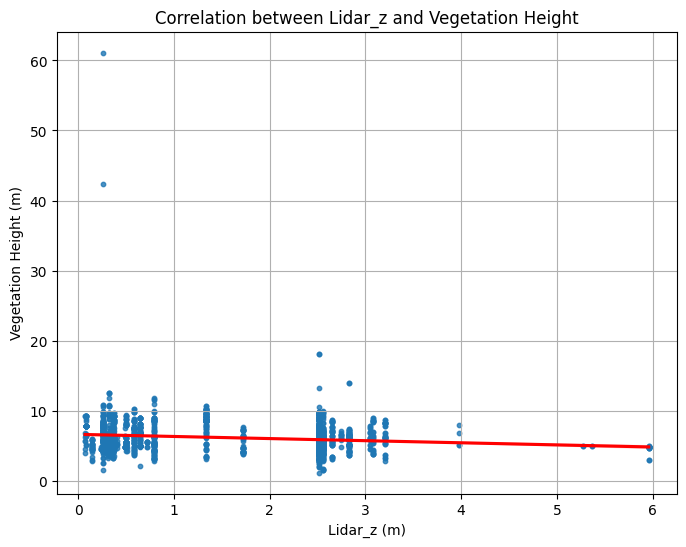

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr

# Ensure the 'height' column exists in vegetation data
if "height" in merged_gdf.columns:
    # Select only valid numeric values
    merged_clean = merged_gdf[["Lidar_z", "height"]].replace([np.inf, -np.inf], np.nan).dropna()

    lidar_elevation = merged_clean["Lidar_z"]
    vegetation_height = merged_clean["height"]

    # Compute correlation statistics
    spearman_corr, spearman_p = spearmanr(lidar_elevation, vegetation_height)
    pearson_corr, pearson_p = pearsonr(lidar_elevation, vegetation_height)

    print(f"Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")
    print(f"Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")

    # Create scatter plot with regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(x=lidar_elevation, y=vegetation_height, scatter_kws={'s':10}, line_kws={'color':'red'})

    plt.xlabel("Lidar_z (m)")
    plt.ylabel("Vegetation Height (m)")
    plt.title("Correlation between Lidar_z and Vegetation Height")
    plt.grid(True)
    plt.show()
else:
    print("No 'height' column found in vegetation data. Check column names.")


# Canopy height model data

In [ ]:
# byTileAOP(dpID="DP3.30015.001", site="WREF", year="2017",
#           easting=veg$adjEasting[which(veg$plotID=="WREF_075")],
#           northing=veg$adjNorthing[which(veg$plotID=="WREF_075")],
#           check.size=FALSE, savepath=wd)


#chm <- rast(paste0(wd, "/DP3.30015.001/neon-aop-products/2017/FullSite/D16/2017_WREF_1/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D16_WREF_DP3_580000_5075000_CHM.tif"))

In [ ]:

# # use os.path.join to get the full path of the laz file
# laz_data_file=os.path.join(laz_path,'NEON_D04_GUAN_DP1_725000_1985000_classified_point_cloud_colorized.laz')
# # read the laz file into a LasData object using laspy.read()
# point_cloud=laspy.read(laz_data_file)



# laz = byTileAOP(dpID="DP1.30003.001", site="GUAN", year="2018",
#           easting=veg$adjEasting[which(veg$plotID=="GUAN_047")],
#           northing=veg$adjNorthing[which(veg$plotID=="GUAN_047")],
#           check.size=FALSE)#, savepath=wd)


# chm <- rast(paste0(wd, "/DP1.30003.001/neon-aop-products/2018/FullSite/D16/2017_WREF_1/L3/DiscreteLidar/CanopyHeightModelGtif/NEON_D16_WREF_DP3_580000_5075000_CHM.tif"))


In [ ]:

# # Define the path to the laz file
# laz_path <- "/content/DP1.30003.001/neon-aop-products/2018/FullSite/D04/2018_GUAN_1/L1/DiscreteLidar/ClassifiedPointCloud"

# # List files in the directory to check for the file name
# print(list.files(laz_path))

# # Update the file name using the correct name from the output of list.files()
# laz_data_file <- file.path(laz_path, "NEON_D04_GUAN_DP1_725000_1988000_classified_point_cloud_colorized.laz")  # replace with the correct name
# # or use list.files to find the correct file

# # check to see if the file exists using file.exists()
# if (file.exists(laz_data_file)) {
#   # Read the laz file
#   point_cloud <- read.las(laz_data_file)

#   # Print summary of the point cloud data
#   print(point_cloud)
# } else {
#   print(paste("Error: File not found at", laz_data_file))
# }

In [ ]:
# plot(chm, col=topo.colors(5))

# plot(point_cloud, col=topo.colors(5))

# 4. Comparing the two datasets

In [ ]:

%%R
vegsub <- veg[which(veg$adjEasting >= ext(colors)[1] &
                      veg$adjEasting <= ext(colors)[2] &
                      veg$adjNorthing >= ext(colors)[3] &
                      veg$adjNorthing <= ext(colors)[4]),]


Error: unable to find an inherited method for function ‘ext’ for signature ‘x = "function"’


In [ ]:
%%R
vegsub <- veg[which(veg$adjEasting >= ext(chm)[1] &
                      veg$adjEasting <= ext(chm)[2] &
                      veg$adjNorthing >= ext(chm)[3] &
                      veg$adjNorthing <= ext(chm)[4]),]

  error in evaluating the argument 'x' in selecting a method for function 'ext': object 'chm' not found




Error in h(simpleError(msg, call)) : 
  error in evaluating the argument 'x' in selecting a method for function 'ext': object 'chm' not found


In [ ]:
%%R
valCHM <- extract(chm,
                  cbind(vegsub$adjEasting,
                  vegsub$adjNorthing))



plot(valCHM$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegsub$height, pch=20, xlab="Height",
     ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

  error in evaluating the argument 'x' in selecting a method for function 'extract': object 'chm' not found




Error in h(simpleError(msg, call)) : 
  error in evaluating the argument 'x' in selecting a method for function 'extract': object 'chm' not found


In [ ]:
%%R
cor(valCHM$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegsub$height, use="complete")

## [1] 0.3824467

In [ ]:
valCHMbuff <- extract(chm,
                  buffer(vect(cbind(vegsub$adjEasting,
                  vegsub$adjNorthing)),
                  width=vegsub$adjCoordinateUncertainty),
                  fun=max)



plot(valCHMbuff$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegsub$height, pch=20, xlab="Height",
     ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(valCHMbuff$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegsub$height, use="complete")

## [1] 0.3698753

map-centric approach

In [ ]:
easting10 <- 10*floor(vegsub$adjEasting/10)

northing10 <- 10*floor(vegsub$adjNorthing/10)

vegsub <- cbind(vegsub, easting10, northing10)

In [ ]:
attributes(vegsub)

In [ ]:
vegbin <- stats::aggregate(vegsub,
                           by=list(vegsub$easting10,
                                   vegsub$northing10),
                           FUN=max)

In [ ]:
CHM10 <- terra::aggregate(chm, fact=10, fun=max)

plot(CHM10, col=topo.colors(5))

In [ ]:
vegbin$easting10 <- vegbin$easting10 + 5

vegbin$northing10 <- vegbin$northing10 + 5

binCHM <- extract(CHM10, cbind(vegbin$easting10,
                               vegbin$northing10))

plot(binCHM$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegbin$height, pch=20,
     xlab="Height", ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(binCHM$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegbin$height, use="complete")

## [1] 0.2244228

tree-centric approach

In [ ]:
vegsub <- vegsub[order(vegsub$height,
                       decreasing=T),]

In [ ]:
vegfil <- vegsub

for(i in 1:nrow(vegsub)) {
    if(is.na(vegfil$height[i]))
        next
    dist <- sqrt((vegsub$adjEasting[i]-vegsub$adjEasting)^2 +
                (vegsub$adjNorthing[i]-vegsub$adjNorthing)^2)
    vegfil$height[which(dist<0.3*vegsub$height[i] &
                        vegsub$height<vegsub$height[i])] <- NA
}



vegfil <- vegfil[which(!is.na(vegfil$height)),]

In [ ]:
filterCHM <- extract(chm,
                     cbind(vegfil$adjEasting,
                           vegfil$adjNorthing))

plot(filterCHM$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegfil$height, pch=20,
     xlab="Height", ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(filterCHM$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegfil$height)

## [1] 0.8070586

In [ ]:
vegfil <- vegfil[which(vegfil$plantStatus=="Live"),]

filterCHM <- extract(chm,
                     cbind(vegfil$adjEasting,
                           vegfil$adjNorthing))

plot(filterCHM$NEON_D16_WREF_DP3_580000_5075000_CHM~
       vegfil$height, pch=20,
     xlab="Height", ylab="Canopy height model")

lines(c(0,50), c(0,50), col="grey")

In [ ]:
cor(filterCHM$NEON_D16_WREF_DP3_580000_5075000_CHM,
    vegfil$height)

## [1] 0.9057883